In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##                                    **PROJECT - ClASSIFIACTION -Prediction of Bank Churn Customer**

### Project Description:

**The aim of this project is to develop a machine learning model that can predict whether a bank customer is likely to churn or not. Churn is a term used in the banking industry to describe the situation where a customer closes their account or stops using a particular bank's services. This project will focus on developing a classification model that can predict whether a customer is likely to churn based on various factors such as demographics, transactional data, and other relevant information**




*The first step in this project would be to gather the necessary data. This data can be obtained from the bank's database or from external sources such as customer surveys or other market research. Once the data has been collected, it will need to be pre-processed and cleaned to remove any missing or irrelevant information.*

*Next, the data will be divided into two sets: a training set and a testing set. The training set will be used to train the machine learning model, while the testing set will be used to evaluate its performance.*



*Various machine learning algorithms can be used to develop the classification model, such as logistic regression, decision trees, random forests, or support vector machines. The performance of the model can be evaluated using various metrics such as accuracy, precision, recall, and F1 score.*


*Once the model has been trained and evaluated, it can be used to predict whether a new customer is likely to churn or not. This information can be used by the bank to take appropriate measures such as offering special promotions or incentives to retain customers who are at risk of churning.*



***Overall, the goal of this project is to develop a machine learning model that can help banks to identify customers who are likely to churn and take appropriate measures to retain them.***

**Importing the Liberies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,FunctionTransformer
sb.set(style="white") #white background style for seaborn plots
sb.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore')

#     **Read the  Data**





In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Mini project of CLASSOFICATION  ML DATA /DS3_C6_S2_Classification_BankChurn_Data_Project.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Size of the Data**

In [ ]:
df.shape


(10000, 13)

**here we can see Geography there are only three countries names to be present remaining we have to relplace with  the orginla name**

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

In [ ]:
df['Geography']=df['Geography'].replace(['fra'],'France')
df['Geography']=df['Geography'].replace(['espanio'],'Spain')
df['Geography']=df['Geography'].replace(['ger'],'Germany')
df['Geography']=df['Geography'].replace(['spain'],'Spain')
df['Geography']=df['Geography'].replace(['germany'],'Germany')
df['Geography']=df['Geography'].replace(['gernamy'],'Germany')
df['Geography']=df['Geography'].replace(['GERMANY'],'Germany')
df['Geography']=df['Geography'].replace(['france'],'France')

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

we can remove the CustomerId  there is no need in use

In [ ]:
df.drop(columns='CustomerId',inplace=True,axis=1)

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [ ]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [ ]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [ ]:
df['HasCrCard'].unique()

array([1, 0])

In [ ]:
df['IsActiveMember'].unique()

array([1, 0])

In [ ]:
df['Exited'].unique()

array([1, 0])

**Missing Values Treatment**

In [ ]:
df[df.isnull().any(axis=1)]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
#check all missing values
def cal_missing_value(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])
    return missing_data
cal_missing_value(df)


,Total,Percentage
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0


**We can see above There is no missing values in the data**

# **Checking the Noise in the Data**
here we are converting the data in two parts for checking the

1 is numerical data

2 categorical data

In [ ]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# function 
for cols in list(numeric_data.columns):
  print(df[cols].value_counts())
  print("-----------------------------------")

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
-----------------------------------
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
-----------------------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
-----------------------------------
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64
-----------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
-----------------------------------
1    7055
0    2945
Name: HasCrCard, dtype: in

**we can see there is no Noice in the Numerical_data** 

In [ ]:
categorical_data=df.select_dtypes(exclude=[np.number])
categorical_data

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [ ]:
# function 
for cols in list(categorical_data.columns):
  print(df[cols].value_counts())
  print("-----------------------------------")

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
-----------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
-----------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
-----------------------------------


**There is No Noice in the Categorical data**

**Exploratry data analysis**

# Visulization

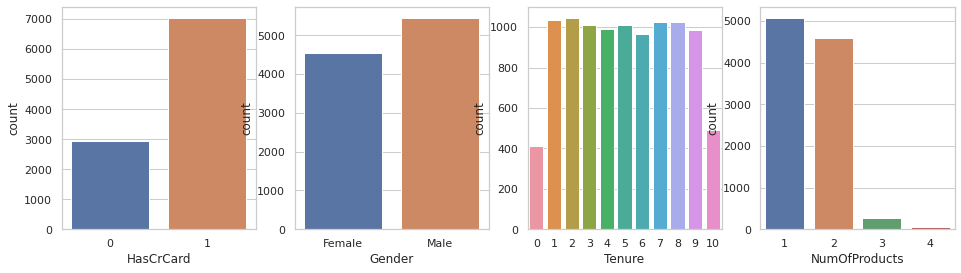

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(241)
sb.countplot(data=df,x='HasCrCard')
plt.subplot(242)
sb.countplot(data=df,x='Gender')
plt.subplot(243)
sb.countplot(data=df,x='Tenure')
plt.subplot(244)
sb.countplot(data=df,x='NumOfProducts')
plt.show()

* we can see in the  HsCrCrd graph
  * coustomers who haveing the credit card are more in count 
---

* we can see Gender graph 
   * more Male customers are in bank 
---
* we can see the tenure graph 
  * the customers who haveing the Turner 2 are in high in count in the bank 
---
* we can see in the above NumOfProducts graph
   * the customers who are haveing the Numberofproduct 1,2 are in high count 





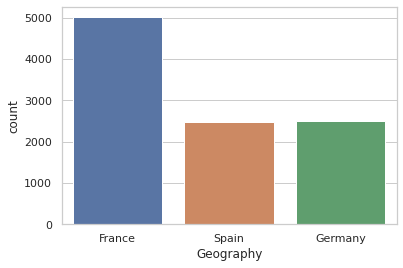

In [ ]:
sb.countplot(data=df,x='Geography')
plt.show()

we cans see the Geograph Graph 
* France has highest no of customers in the bank 

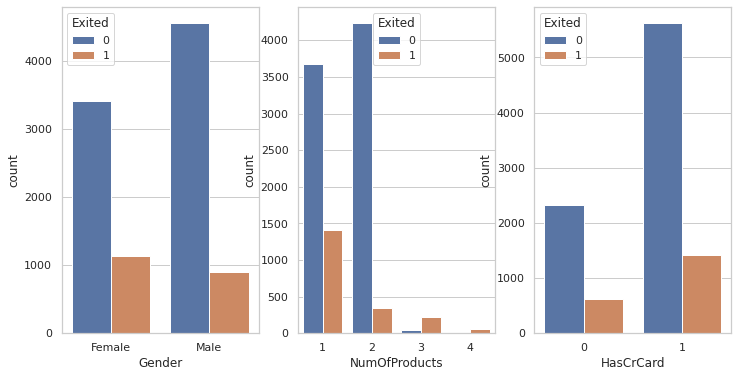

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(131)
sb.countplot(data=df,x='Gender',hue='Exited')
plt.subplot(132)
sb.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.subplot(133)
sb.countplot(data=df,x='HasCrCard',hue='Exited')
plt.show()

*  we can observe genedr graph  the data there are more Number  of Males in count who are going to leave the bank

*  we can see in the above NumOfProducts graph who have the NumOfProducts 1,2 are there are in highest among other NumOfProduct The customers who are leaving the bank are also they are in high count 

* we can observe the above  HasCrCard graph  
    *  the customers who have the HasCrCard -credict card are more in count of customers are leaving the bank 

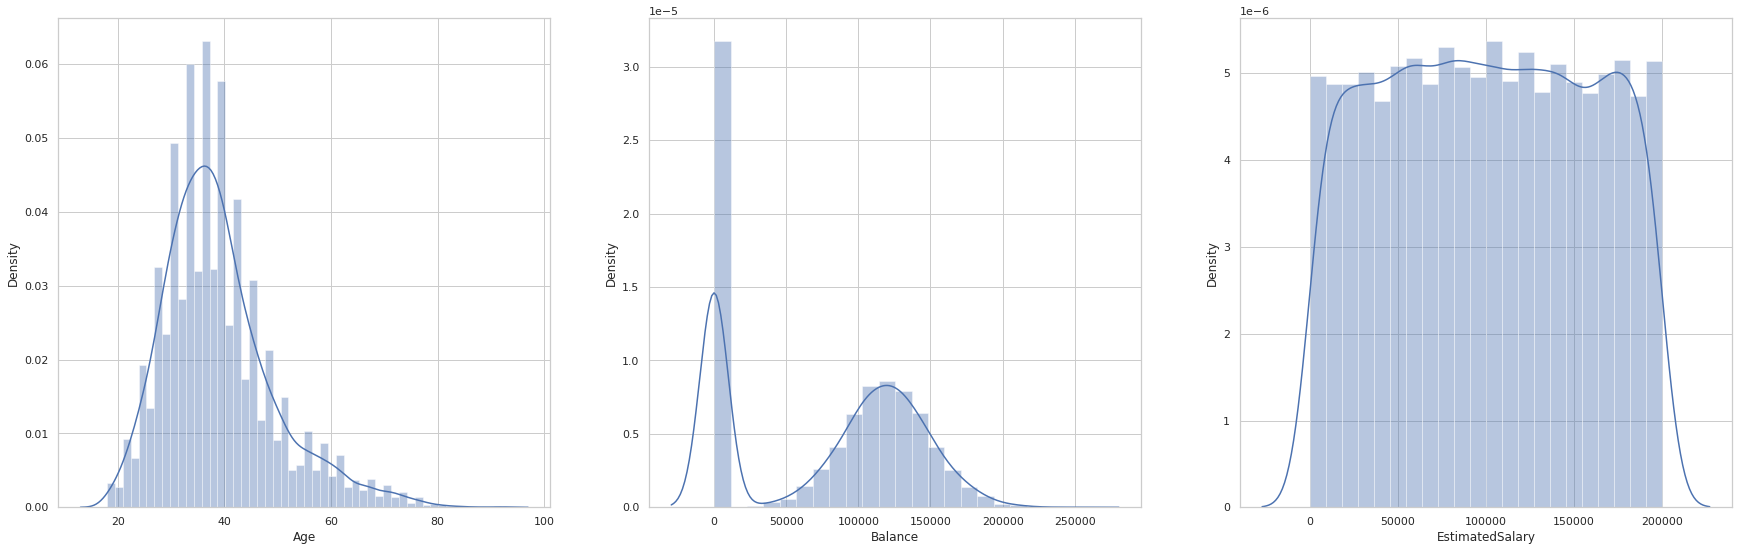

In [ ]:
plt.figure(figsize=(30,9))
plt.subplot(131)
sb.distplot(df['Age'])

plt.subplot(132)
sb.distplot(df['Balance'])

plt.subplot(133)
sb.distplot(df['EstimatedSalary'])
plt.show()

*  In the above graphs we can see the  the customers whose Age is between 25-40 Age customers are in the more in count  

*  the customesr whose balance is 0 are more in count in the data set 
* we cans see the above graph EstimatedSaklary is Normal distribution

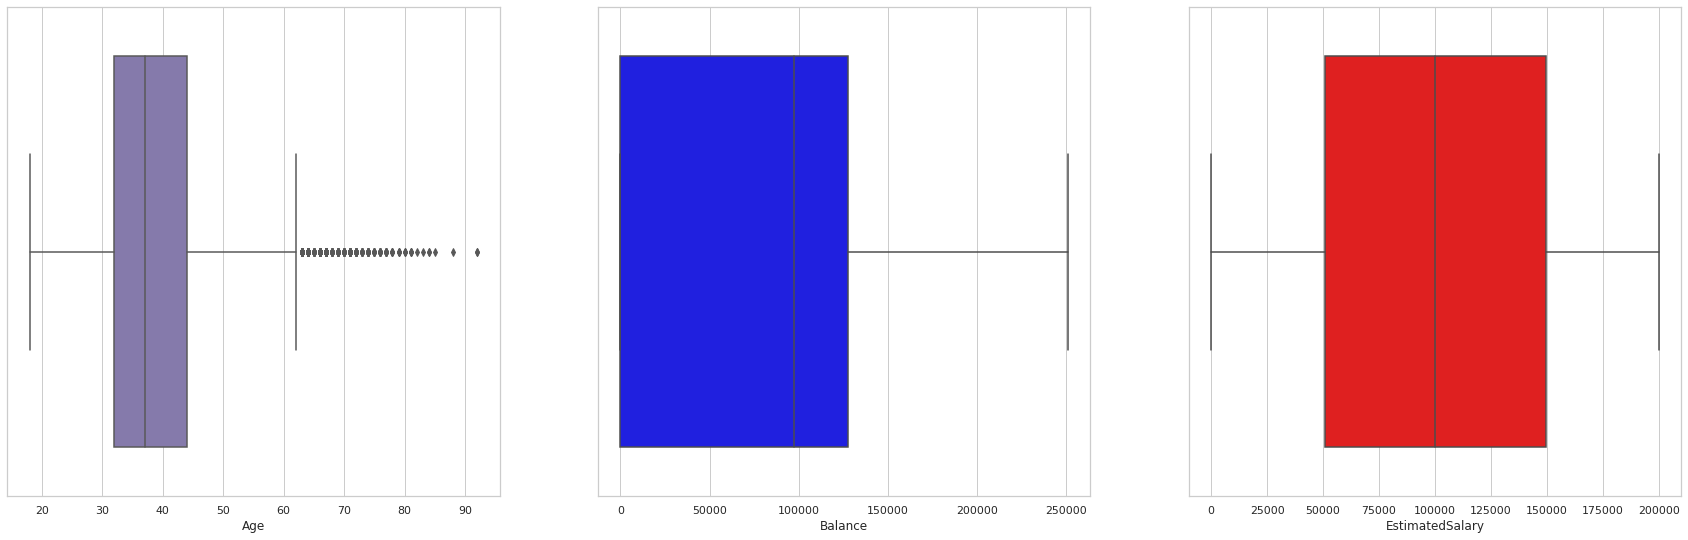

In [ ]:
plt.figure(figsize=(30, 9))
plt.subplot(131)
sb.boxplot(df['Age'],color='m')
plt.subplot(132)
sb.boxplot(df['Balance'],color='blue')

plt.subplot(133)
sb.boxplot(df['EstimatedSalary'],color='red')

plt.show()

* we can see the Outliers the Customers whoes age is above the 60 

* the customers whose Averege balance is 76485.8 

* we can see the above graph the  Average EstimatedSalary is 100000

**Summerise the Data**

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Structure of the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


**we can see in the data there are three columns are in object type**
**we have to convert all the object type columns  into categorical type for Model building**

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Surname']=label_encoder.fit_transform(df['Surname'])
df['Geography']=label_encoder.fit_transform(df['Geography'])
df['Gender']=label_encoder.fit_transform(df['Gender'])

15


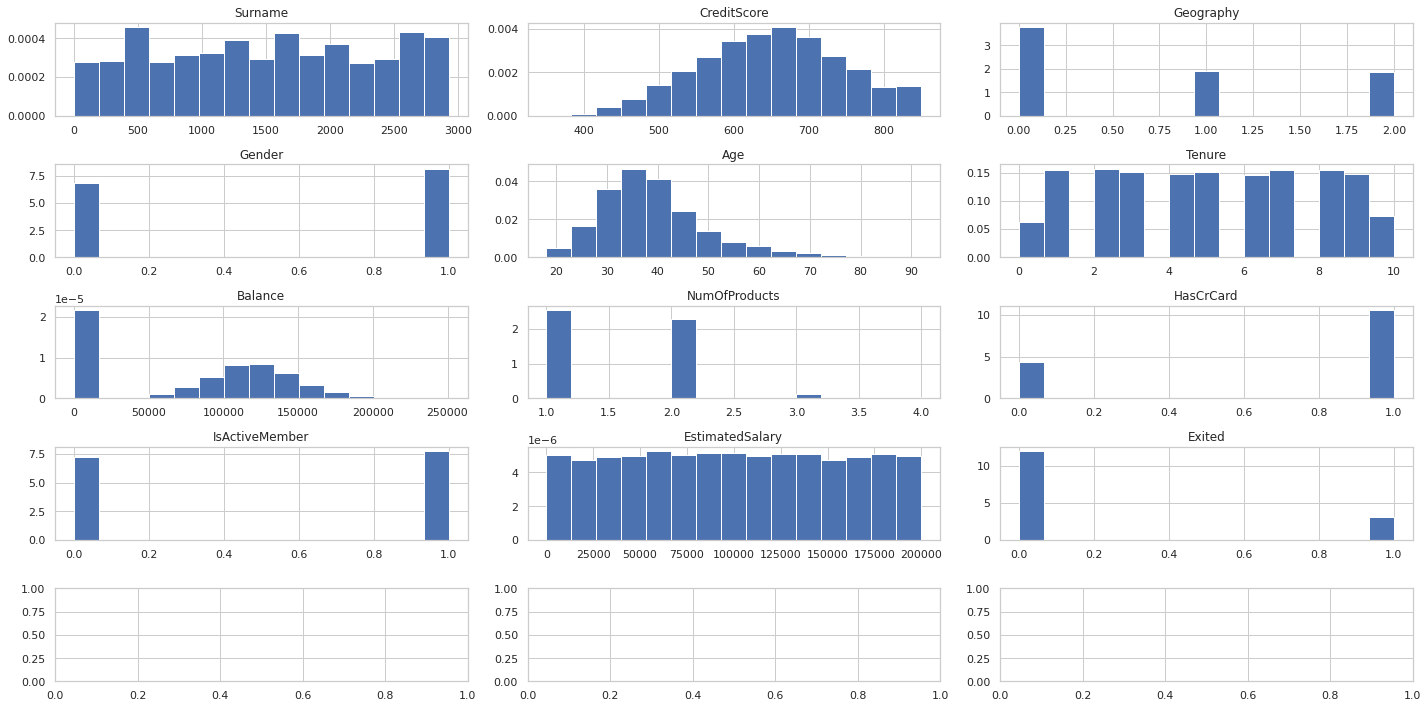

In [ ]:
# Histogram for all numeric cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n)) #research
  
bin_count = int(np.ceil(np.log2(len(new_df.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(new_df[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

we can see the distribution every column the data is not normally distributed we can  use the MinmaxeScaler scaling 

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data=df[['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']]

In [ ]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57
3,289,699,0,0,39,1,0.00,2,0,0,93826.63
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,771,0,1,39,5,0.00,2,1,0,96270.64
9996,1336,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,1570,709,0,0,36,7,0.00,1,0,1,42085.58
9998,2345,772,1,1,42,3,75075.31,2,1,0,92888.52


**Performing the Data Scaling**

In [ ]:
Scaler=StandardScaler()
df_scaled=pd.DataFrame(Scaler.fit_transform (data.to_numpy()),columns=data.columns)

In [ ]:
df_scaled

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.464182,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.390910,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,0.628988,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.440354,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,0.371355,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.580534,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-0.203003,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.073539,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,0.989439,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [ ]:
df_scaled['Exited']=df['Exited']

In [ ]:
df_scaled

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.464182,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.390910,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,0.628988,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,-1.440354,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,0.371355,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.580534,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9996,-0.203003,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9997,0.073539,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1
9998,0.989439,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1


In [ ]:
correlation=df_scaled.corr()

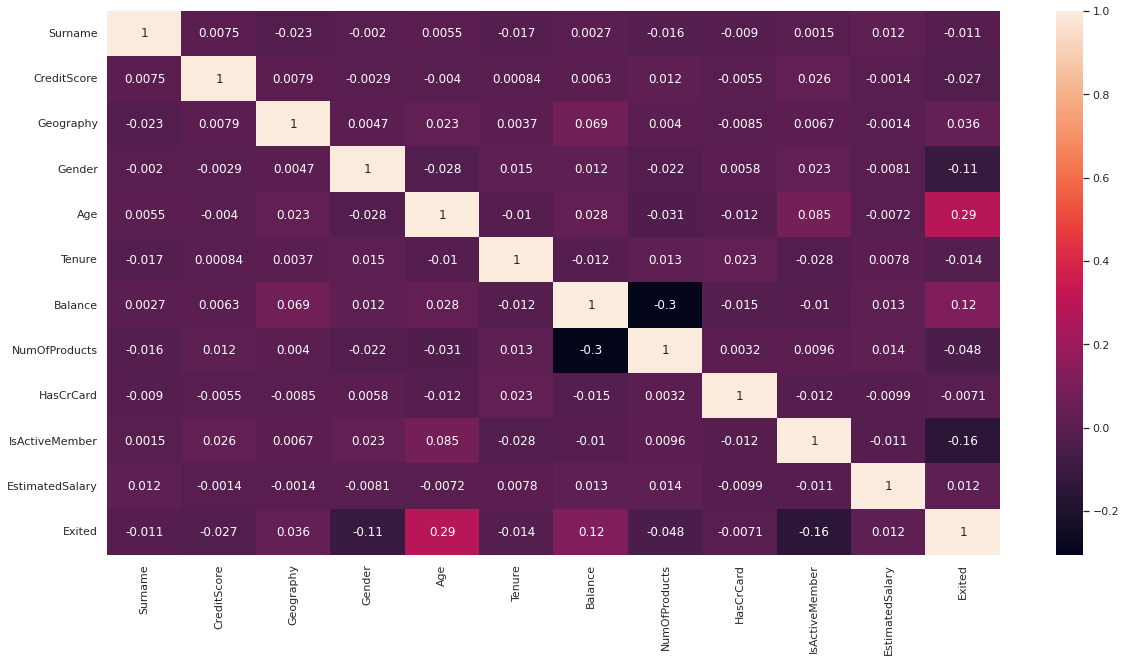

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(data=correlation,annot=True)
plt.show()

In [ ]:
rank=pd.DataFrame(correlation['Exited'][1:]).reset_index()
rank.rename(columns={'index':'names','Exited':'values'},inplace=True)

In [ ]:
rank.sort_values(by='values',ascending=False,inplace=True)
rank

,names,values
10,Exited,1.000000
3,Age,0.285323
5,Balance,0.118533
1,Geography,0.035943
9,EstimatedSalary,0.012097
7,HasCrCard,-0.007138
4,Tenure,-0.014001
0,CreditScore,-0.027094
6,NumOfProducts,-0.047820
2,Gender,-0.106512


**we can see the above table  Highly correleated with the exited (target varible)**
* Age 
* Balnace
---
* 	IsActiveMember

**split the data into train set and test set in 70:30 ratio by row index**

In [ ]:
x,y=df_scaled.iloc[:,:-1],df_scaled.iloc[:,-1]

In [ ]:
print(x.shape,y.shape)

(10000, 11) (10000,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [ ]:
print(x_train.shape,y_train.shape)

(7000, 11) (7000,)


In [ ]:
print(x_test.shape,y_test.shape)

(3000, 11) (3000,)


**Model Building**

In [ ]:
# Training the model

model_logistic = LogisticRegression().fit(x_train,y_train)

**Predict the exited customers from the data by using the logistic regression**

In [ ]:
y_pred1=model_logistic.predict(x_test)

In [ ]:
# Accuracy of the training data set
train_accuracy = round(model_logistic.score(x_train,y_train)*100,2)
test_accuracy=round(model_logistic.score(x_test,y_test)*100,2)
Accuracy_score=round(accuracy_score(y_test,y_pred1))
print('train_accuracy   =>',train_accuracy )
print('test_accuracy   =>',test_accuracy )
print('Accuracy_SCORE   =>',Accuracy_score)

train_accuracy   => 81.1
test_accuracy   => 80.1
Accuracy_SCORE   => 1


**Model Evaluation**

In [ ]:
# confusionMatrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred1))

[[2286   77]
 [ 520  117]]


In [ ]:


from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
print("accuracy :",accuracy_score(y_test,y_pred1))
print("recall :",round(recall_score(y_test,y_pred1),2))
print("f1_score :",round(f1_score(y_test,y_pred1),2))
print("precision :",round(precision_score(y_test,y_pred1),2))

accuracy : 0.801
recall : 0.18
f1_score : 0.28
precision : 0.6


* **Precision:- A precision score is used to measure teh model performance in measuring the court of true positives in the correct manner out of all positive predictions made**



* **Recall:- recall sore is used to measure the model performance in terms of measuring the court of true positive in acorrect manner out of all the actual positive values.**



* **Accuracy:- Accuracy score is used to measure the model performance in terms of measuring teh ratio of sumof true positive and true negatives out of all the predictions made**

*  **F1 score :- F1Score represents the model score as a function of precision and recall score**

**Evaluate the ROC AND AUC Scores**

In [ ]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, model_logistic.predict_proba(x_test)[:,1])
roc

0.7503479532377422

Draw the ROC-AUC and interpret the models performance from the curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.750


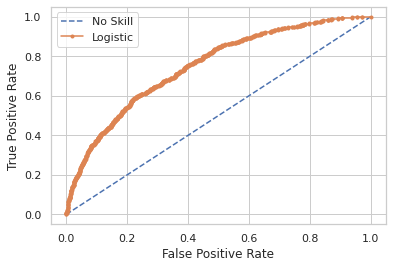

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model_logistic.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show() 

No Skill: ROC AUC=0.500

Logistic: ROC AUC=0.752

AUC IS nearly to 1 we can say our model is good model

# **For GaussianNB Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from numpy.random import default_rng
from matplotlib.colors import ListedColormap

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train) 

GaussianNB()

In [ ]:
x_train.shape
print(classifier.score(x_train,y_train))
print(classifier.score(x_test,y_test))

0.8294285714285714
0.825


In [ ]:
y_pred2=classifier.predict(x_test)

In [ ]:
probability_values=classifier.predict_proba(x_test)
probability_values

array([[0.60038572, 0.39961428],
       [0.51707352, 0.48292648],
       [0.83136661, 0.16863339],
       ...,
       [0.94253726, 0.05746274],
       [0.9442229 , 0.0557771 ],
       [0.81396427, 0.18603573]])

Confusion matrix of GaussianNB

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[2318,   45],
       [ 480,  157]])

In [ ]:
# here we can obsereve the accuracy of a tarin and 
print('tarining accuracy  ===>',round(classifier.score(x_train,y_train)*100,2))
print('test accuarcy   ====>',round(classifier.score(x_test,y_test)*100),2)
print('accuracy_score  ==> ',round(accuracy_score(y_test, y_pred2)*100,2))

tarining accuracy  ===> 82.94
test accuarcy   ====> 82 2
accuracy_score  ==>  82.5


In [ ]:
print("accuracy :",accuracy_score(y_test,y_pred2))
print("recall :",round(recall_score(y_test,y_pred2),2))
print("f1_score :",round(f1_score(y_test,y_pred2),2))
print("precision :",round(precision_score(y_test,y_pred2),2))

accuracy : 0.825
recall : 0.25
f1_score : 0.37
precision : 0.78


# **Random Forest Classfier**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

Hyperparameter tuning for Random Forest using GridSearchCV and fit the data

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1, verbose=3, scoring="accuracy")
grid_search

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 5.86 s, sys: 715 ms, total: 6.57 s
Wall time: 3min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
 rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [ ]:
# random forest
model_Rf = RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,random_state=42)
model_Rf.fit(x_train,y_train)
y_pred3 = model_Rf.predict(x_test)
print("Accuaracy on train dataset :",round(model_Rf.score(x_train,y_train)*100,2))
print("Accuaracy on test dataset :",round(model_Rf.score(x_test,y_test)*100,2))
print('accuracy_score  ==> ',round(accuracy_score(y_test, y_pred3)*100,2))

Accuaracy on train dataset : 88.1
Accuaracy on test dataset : 85.5
accuracy_score  ==>  85.5


In [ ]:
print("accuracy :",accuracy_score(y_test,y_pred3))
print("recall :",round(recall_score(y_test,y_pred3),2))
print("f1_score :",round(f1_score(y_test,y_pred3),2))
print("precision :",round(precision_score(y_test,y_pred3),2))

accuracy : 0.855
recall : 0.43
f1_score : 0.56
precision : 0.79


# **Decision tree**

In [ ]:
1# Decision tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=20,min_samples_split=5,max_leaf_nodes=10) # After max depth 6 the acc is cons
model_DT.fit(x_train,y_train)
y_pred4 = model_DT.predict(x_test)
print("Accuaracy on train dataset :",round(model_DT.score(x_train,y_train)*100,2))
print("Accuaracy on train dataset :",round(model_DT.score(x_test,y_test)*100,2))
print('accuracy_score  ==> ',round(accuracy_score(y_test, y_pred4)*100,2))

Accuaracy on train dataset : 85.66
Accuaracy on train dataset : 84.33
accuracy_score  ==>  84.33


In [ ]:
print("accuracy :",accuracy_score(y_test,y_pred4))
print("recall :",round(recall_score(y_test,y_pred4),2))
print("f1_score :",round(f1_score(y_test,y_pred4),2))
print("precision :",round(precision_score(y_test,y_pred4),2))

accuracy : 0.8433333333333334
recall : 0.45
f1_score : 0.55
precision : 0.71


# **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_AB = AdaBoostClassifier(n_estimators=100, random_state=0)
model_AB.fit(x_train,y_train)
y_pred5 = model_AB.predict(x_test)
print("Accuarcy :",round(model_AB.score(x_train,y_train)*100,2))
print("Accuarcy :",round(model_AB.score(x_test,y_test)*100,2))
print('accuracy_score  ==> ',round(accuracy_score(y_test, y_pred5)*100,2))

Accuarcy : 86.41
Accuarcy : 85.0
accuracy_score  ==>  85.0


In [ ]:
print("accuracy :",accuracy_score(y_test,y_pred5))
print("recall :",round(recall_score(y_test,y_pred5),2))
print("f1_score :",round(f1_score(y_test,y_pred5),2))
print("precission :",round(precision_score(y_test,y_pred5),2))

accuracy : 0.85
recall : 0.47
f1_score : 0.57
precission : 0.73


In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [ ]:
# We will try with max depth starting from 1 to 15 and depending on the final ‘rmse’ score choose the value of max_depth.
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import  tree
max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for val in max_depth:  
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), x, y, cv=kfolds, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.38
For max depth: 2
rmse= 0.36
For max depth: 3
rmse= 0.35
For max depth: 4
rmse= 0.34
For max depth: 5
rmse= 0.34
For max depth: 6
rmse= 0.34
For max depth: 7
rmse= 0.34
For max depth: 8
rmse= 0.35
For max depth: 9
rmse= 0.36
For max depth: 10
rmse= 0.37
For max depth: 11
rmse= 0.40
For max depth: 12
rmse= 0.41
For max depth: 13
rmse= 0.42
For max depth: 14
rmse= 0.43
For max depth: 15
rmse= 0.44
For max depth: 16
rmse= 0.44
For max depth: 17
rmse= 0.45
For max depth: 18
rmse= 0.46
For max depth: 19
rmse= 0.46
For max depth: 20
rmse= 0.46


# **Conclusion**

In [ ]:
scores=pd.DataFrame() # Final result

In [ ]:
scores['Models'] = ['Logistic_Regression','GussainNb model','RandomForest classfier','Decision Tree classfier','AdaBoosting']


In [ ]:

scores['Training accuracy']=['81.1','82.94','88.1','85.66','86.26']
scores['Test accuracy']=['80.1','82.5','85.5','84.33','84.83']
scores['Accuracy Score']=['80.1','82.5','84.33','84.33','84.83']
scores['recall']=['18','25','43','45','47']
scores['F1score']=['28','37','56','55','57']
scores['precission']=['60','78','79','71','72']


In [ ]:
scores

,Models,Training accuracy,Test accuracy,Accuracy Score,recall,F1score,precission
0,Logistic_Regression,81.1,80.1,80.1,18,28,60
1,GussainNb model,82.94,82.5,82.5,25,37,78
2,RandomForest classfier,88.1,85.5,84.33,43,56,79
3,Decision Tree classfier,85.66,84.33,84.33,45,55,71
4,AdaBoosting,86.26,84.83,84.83,47,57,72


we can observe the 5 models 
* **Training Accuracy**
* **Test Accuracy**
* **Recall**
* **F1Score**
* **precission**

The Model recognize positive cases



* **Recall:-The ability of a classification model to identify all data points in a relevant class.**

* **Precission:- The abiolity of classification nodel to return only the data points in a class**

* **F1score:-  A single metric that combaines recall and precission using the harmonic mean**




RandomForest is giveing the best accuarcy then the other model